In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=03357120a9caa81064d2a01508c51960


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | ixtapa
Processing Record 4 of Set 1 | luanda
Processing Record 5 of Set 1 | fort nelson
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | mecca
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | bagn
Processing Record 13 of Set 1 | tigil
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | flinders
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | grand island
Processing Record 23 of Set 1 | longyearbyen
Processing Re

Processing Record 41 of Set 4 | kloulklubed
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | creel
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | ribeira grande
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | ngorongoro
Processing Record 48 of Set 4 | mendota
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 50 of Set 4 | norman wells
Processing Record 1 of Set 5 | yeppoon
Processing Record 2 of Set 5 | deputatskiy
Processing Record 3 of Set 5 | belyy yar
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | alikalia
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | cherskiy
Processing Record 8 of Set 5 | tsuruoka
Processing Record 9 of Set 5 | saint-philippe
Processing Record 10 of Set 5 | kaduna
Processing Record 11 of Set 5 | perumpavur
Processing Record 12 of Set 5 | tuzser
Processing Record 13 of 

Processing Record 25 of Set 8 | kahului
Processing Record 26 of Set 8 | tarauaca
Processing Record 27 of Set 8 | betsiamites
Processing Record 28 of Set 8 | bima
Processing Record 29 of Set 8 | west fargo
Processing Record 30 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 31 of Set 8 | kiunga
Processing Record 32 of Set 8 | bulawayo
Processing Record 33 of Set 8 | abu samrah
Processing Record 34 of Set 8 | pozo colorado
Processing Record 35 of Set 8 | bay roberts
Processing Record 36 of Set 8 | muros
Processing Record 37 of Set 8 | moissala
Processing Record 38 of Set 8 | khasan
Processing Record 39 of Set 8 | olinda
Processing Record 40 of Set 8 | chagda
City not found. Skipping...
Processing Record 41 of Set 8 | zhangye
Processing Record 42 of Set 8 | khani
Processing Record 43 of Set 8 | aras
Processing Record 44 of Set 8 | cockburn town
Processing Record 45 of Set 8 | makat
Processing Record 46 of Set 8 | abonnema
Processing Record 47 of Set 8 | swan hill
Proc

Processing Record 19 of Set 12 | pangnirtung
Processing Record 20 of Set 12 | kutum
Processing Record 21 of Set 12 | daru
Processing Record 22 of Set 12 | poya
Processing Record 23 of Set 12 | kallupatti
Processing Record 24 of Set 12 | olavarria
Processing Record 25 of Set 12 | vilhena
Processing Record 26 of Set 12 | ambilobe
Processing Record 27 of Set 12 | pointe michel
Processing Record 28 of Set 12 | zharkent
Processing Record 29 of Set 12 | kingori
Processing Record 30 of Set 12 | manono
Processing Record 31 of Set 12 | komsomolskiy
Processing Record 32 of Set 12 | arlit
Processing Record 33 of Set 12 | leh
Processing Record 34 of Set 12 | wewak
Processing Record 35 of Set 12 | quatre cocos
Processing Record 36 of Set 12 | chegutu
Processing Record 37 of Set 12 | grand forks
Processing Record 38 of Set 12 | mayskiy
Processing Record 39 of Set 12 | grand centre
City not found. Skipping...
Processing Record 40 of Set 12 | pacific grove
Processing Record 41 of Set 12 | almendralejo

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,79.38,78,0,16.46,PF,2020-11-02 18:50:23
1,Souillac,-20.52,57.52,71.60,68,75,11.41,MU,2020-11-02 18:50:23
2,Ixtapa,20.70,-105.20,88.00,58,5,5.82,MX,2020-11-02 18:50:23
3,Luanda,-8.84,13.23,78.80,83,20,8.05,AO,2020-11-02 18:50:23
4,Fort Nelson,58.81,-122.70,8.60,84,90,4.70,CA,2020-11-02 18:49:08
5,Cape Town,-33.93,18.42,71.01,82,0,12.75,ZA,2020-11-02 18:48:30
6,Victoria,22.29,114.16,73.00,70,72,1.01,HK,2020-11-02 18:49:13
7,Hobart,-42.88,147.33,62.01,63,90,10.29,AU,2020-11-02 18:46:04
8,Mecca,21.43,39.83,80.31,67,0,5.53,SA,2020-11-02 18:50:23
9,Rikitea,-23.12,-134.97,72.25,81,9,20.24,PF,2020-11-02 18:50:24


In [7]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2020-11-02 18:50:23,-16.48,-151.75,79.38,78,0,16.46
1,Souillac,MU,2020-11-02 18:50:23,-20.52,57.52,71.60,68,75,11.41
2,Ixtapa,MX,2020-11-02 18:50:23,20.70,-105.20,88.00,58,5,5.82
3,Luanda,AO,2020-11-02 18:50:23,-8.84,13.23,78.80,83,20,8.05
4,Fort Nelson,CA,2020-11-02 18:49:08,58.81,-122.70,8.60,84,90,4.70


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

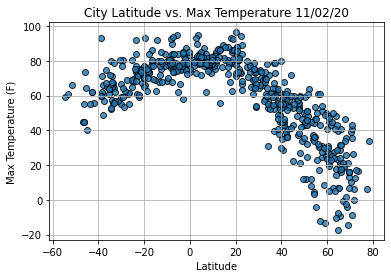

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

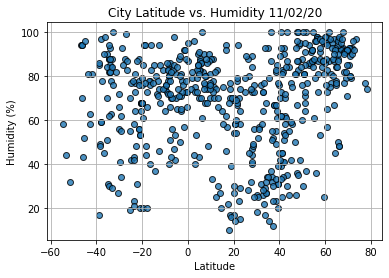

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

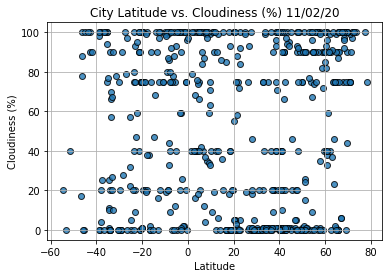

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()